Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
Bank = pd.read_csv("/content/bank-full.csv")
Bank.head()

age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]

In [3]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


As there is catrgorical data pressent in the datast we have to do the one hot encoding to get binary values.

In [5]:
Bank1 = pd.get_dummies(Bank,columns=['job','marital','education','contact','poutcome','month'])
Bank1.head()

age default  balance housing  ... month_may  month_nov  month_oct  month_sep
0   58      no     2143     yes  ...         1          0          0          0
1   44      no       29     yes  ...         1          0          0          0
2   33      no        2     yes  ...         1          0          0          0
3   47      no     1506     yes  ...         1          0          0          0
4   33      no        1      no  ...         1          0          0          0

[5 rows x 49 columns]

In [6]:
Bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [7]:
# we have to convert the default, housing, Loan and y column in the binary form
Bank1['default'] = np.where(Bank1['default'].str.contains("yes"), 1, 0)
Bank1['housing'] = np.where(Bank1['housing'].str.contains("yes"), 1, 0)
Bank1['loan'] = np.where(Bank1['loan'].str.contains("yes"), 1, 0)
Bank1['y'] = np.where(Bank1['y'].str.contains("yes"), 1, 0) 
Bank1.head()

age  default  balance  housing  ...  month_may  month_nov  month_oct  month_sep
0   58        0     2143        1  ...          1          0          0          0
1   44        0       29        1  ...          1          0          0          0
2   33        0        2        1  ...          1          0          0          0
3   47        0     1506        1  ...          1          0          0          0
4   33        0        1        0  ...          1          0          0          0

[5 rows x 49 columns]

# Building a Model

In [9]:
# Dividing our data into input and output variables 
X = pd.concat([Bank1.iloc[:,0:10],Bank1.iloc[:,11:]],axis=1)
Y = Bank1.iloc[:,10]

In [10]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [12]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [13]:
y_pred_df

actual  predicted_prob
0           0               0
1           0               0
2           0               0
3           0               0
4           0               0
...       ...             ...
45206       1               1
45207       1               0
45208       1               1
45209       0               0
45210       0               0

[45211 rows x 2 columns]

# Model Testing

In [14]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39157   765]
 [ 4132  1157]]


In [15]:
#For checking model accuracy
(39157+1157)/(39157+765+4132+1157)*100

89.1685651721926

In [16]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

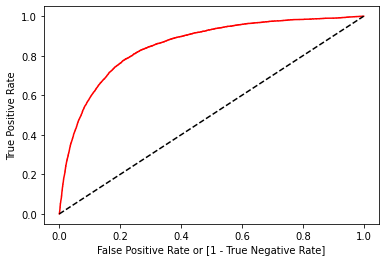

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [18]:
classifier.predict_proba (X)

array([[0.95555739, 0.04444261],
       [0.9752732 , 0.0247268 ],
       [0.98187772, 0.01812228],
       ...,
       [0.32837067, 0.67162933],
       [0.92062742, 0.07937258],
       [0.90136343, 0.09863657]])

In [19]:
auc

0.5997967709372092